## Clustering Model: Model with Product Category

Set up a basic pipeline using **standardized preprocessing from preprocess.py** and distilbert.

🔧 Steps:
1. Import Libraries and load data using **preprocess.py functions**
2. Preprocessing: refer data_preprocessing.ipynb notebook
3. Vectorization: TF-IDF Vectorization
4. Model: K-Means clustering on Review
5. Evaluation: Clustering

✅ Purpose:
Clustering Data in to 2-11 clusters, Product evaluations, Top 5 Products and worst products

## Load Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from wordcloud import WordCloud
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import string
import re
import seaborn as sns
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bshanmugam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bshanmugam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bshanmugam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Step 1: Load the Cleaned data

In [2]:
df = pd.read_csv('data/cleaned_amazon_reviews_final.csv')
print(df.head())
#print(df.info())

                                                name       asins   brand  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   

                                          categories primaryCategories  \
0  Computers,Electronics Features,Tablets,Electro...       Electronics   
1  Computers,Electronics Features,Tablets,Electro...       Electronics   
2  Computers,Electronics Features,Tablets,Electro...       Electronics   
3  Computers,Electronics Features,Tablets,Electro...       Electronics   
4  Computers,Electronics Features,Tablets,Electro...       Electronics   

                                           imageURLs doRecommend  rating  \
0  https://pisces.bbys

In [3]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Step 2: For final clean data (single function)
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text) # remove special characters
    text = re.sub(r'\b\w\b', '', text) # remove single characters
    tokens = word_tokenize(text) # tokenization
    tokens = [w for w in tokens if w.lower() not in stop_words] # remove stop words
    tokens = [w for w in tokens if w not in string.punctuation and not w.isdigit()] # remove punctuations and digits
    tokens = [stemmer.stem(w) for w in tokens] # stemmerizing
    tokens = [lemmatizer.lemmatize(w) for w in tokens] # lemmatizing
    return " ".join(tokens)

df["clean_text"] = df["clean_text"].apply(preprocess_text)

## Step 2: Preprocess and Vectorize text using TF-IDF

In [4]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, min_df=5)
X = vectorizer.fit_transform(df['clean_text'])
print(f"TF-IDF Matrix Shape: {X.shape}")

TF-IDF Matrix Shape: (20063, 2334)


## Step 3: K-Means Clustering

In [5]:
wcss = []
silhouette_scores = []
K = range(2, 8)  # Range from 2 to 7

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # X is the TF-IDF matrix from your notebook
    wcss.append(kmeans.inertia_)  # WCSS
    labels = kmeans.labels_
    if k > 1:  # Silhouette score requires at least 2 clusters
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)

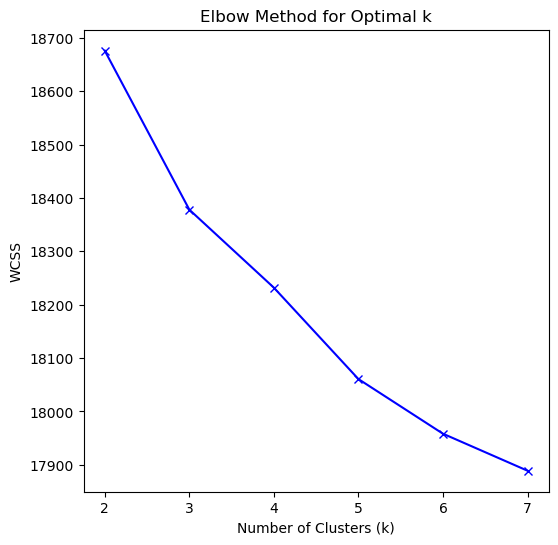

In [6]:
plt.figure(figsize=(6, 6))
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

## Step 4: KMeans Silhouette Score

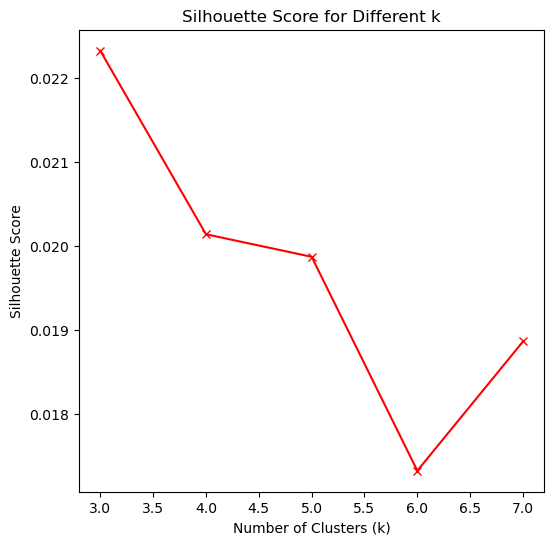

In [7]:
plt.figure(figsize=(6, 6))
plt.plot(K[1:], silhouette_scores[1:], 'rx-')  # Skip k=1 if included
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.show()
silhouette_scores = []
valid_k = []
   

In [8]:
cluster_results = {}

# Run K-Means for each k and generate outputs
for k in range(2, 8):
    # Initialize and fit K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    df['cluster'] = kmeans.fit_predict(X)
    
    # Calculate silhouette score
    score = silhouette_score(X, df['cluster'])
    
    # Store results
    cluster_results[k] = {
        'labels': df['cluster'].copy(),
        'silhouette_score': score,
        'kmeans_model': kmeans
    }
    
    # Print silhouette score
print(f"\nResults for k={k}:")
print(f"Silhouette Score: {score:.4f}")

cluster_counts = df['cluster'].value_counts()
print(f"\nCluster Size Distribution for k={k}:\n{cluster_counts}")


Results for k=7:
Silhouette Score: 0.0189

Cluster Size Distribution for k=7:
cluster
4    6374
0    3424
6    2820
5    2491
2    2283
1    1381
3    1290
Name: count, dtype: int64


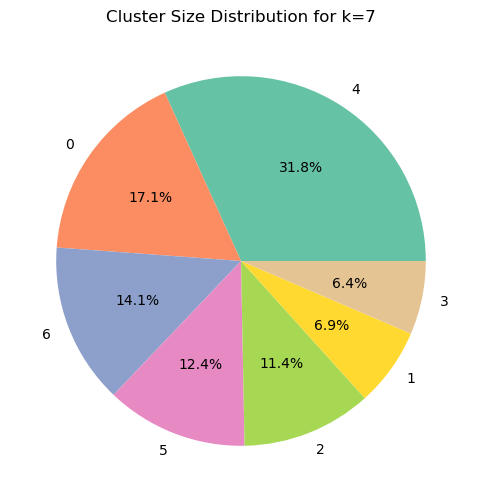

In [9]:
plt.figure(figsize=(6, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title(f'Cluster Size Distribution for k={k}')
plt.show()

## Step 5: Cluster Evaluations

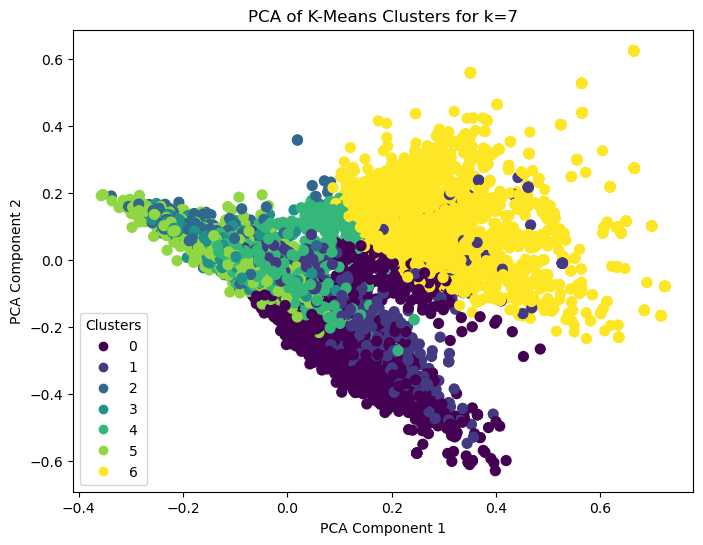

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', s=50)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title(f'PCA of K-Means Clusters for k={k}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [11]:
print("\nSummary of Silhouette Scores:")
for k in range(2, 8):
    print(f"k={k}: Silhouette Score = {cluster_results[k]['silhouette_score']:.4f}")


Summary of Silhouette Scores:
k=2: Silhouette Score = 0.0189
k=3: Silhouette Score = 0.0223
k=4: Silhouette Score = 0.0201
k=5: Silhouette Score = 0.0199
k=6: Silhouette Score = 0.0173
k=7: Silhouette Score = 0.0189


/var/folders/7j/c3cwb7d17c1cfkhmkrqtw4q00000gn/T/ipykernel_19588/965011753.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f'cluster_k{k}', data=df, palette='viridis')


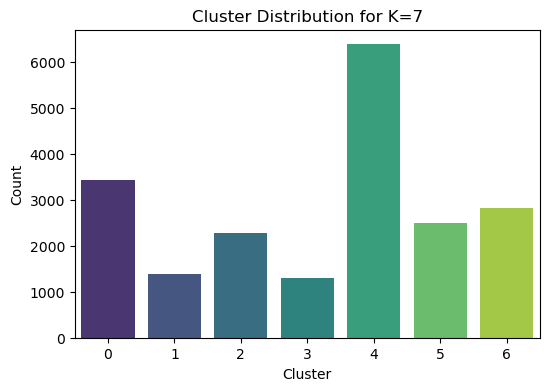

In [12]:
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    df[f'cluster_k{k}'] = labels

plt.figure(figsize=(6, 4))
sns.countplot(x=f'cluster_k{k}', data=df, palette='viridis')
plt.title(f'Cluster Distribution for K={k}')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

## 5.1: Top Words per Cluster

In [13]:
def get_top_terms_per_cluster(kmeans_model, vectorizer, n_terms=10):
    terms = vectorizer.get_feature_names_out()
    top_words = {}
    for i, center in enumerate(kmeans_model.cluster_centers_):
        top_indices = center.argsort()[::-1][:n_terms]
        top_words[i] = [terms[i] for i in top_indices]
    return top_words

In [14]:
from collections import Counter
def top_words_by_cluster(df, cluster_col='cluster', text_col='clean_text', top_n=10):
    cluster_words = {}
    for c in sorted(df[cluster_col].unique()):
        words = ' '.join(df[df[cluster_col] == c][text_col]).split()
        common = Counter(words).most_common(top_n)
        cluster_words[c] = [word for word, _ in common]
    return cluster_words

top_words = top_words_by_cluster(df)
for cluster_id, words in top_words.items():
    print(f"Cluster {cluster_id}: {', '.join(words)}")

Cluster 0: batteri, good, last, brand, great, price, work, long, use, amazon
Cluster 1: great, price, batteri, good, valu, work, product, last, deal, long
Cluster 2: love, great, kid, old, gift, use, bought, year, tablet, easi
Cluster 3: kindl, love, great, read, fire, use, one, book, screen, easi
Cluster 4: great, use, good, work, product, amazon, like, echo, easi, price
Cluster 5: tablet, great, use, kid, good, price, love, amazon, easi, fire
Cluster 6: star, five, batteri, good, great, price, work, four, last, long


## Step 6: Analyze Clusters

In [15]:
cluster_counts = df['cluster'].value_counts().sort_index()
print(cluster_counts)

for cluster_id in range(optimal_k):
    print(f"Cluster {cluster_id}:")
    print(df[df['cluster'] == cluster_id]['name'].sample(3))  # Display 3 random samples
    print("\n")

cluster
0    3424
1    1381
2    2283
3    1290
4    6374
5    2491
6    2820
Name: count, dtype: int64


NameError: name 'optimal_k' is not defined

## Step 7: Visualize Clusters

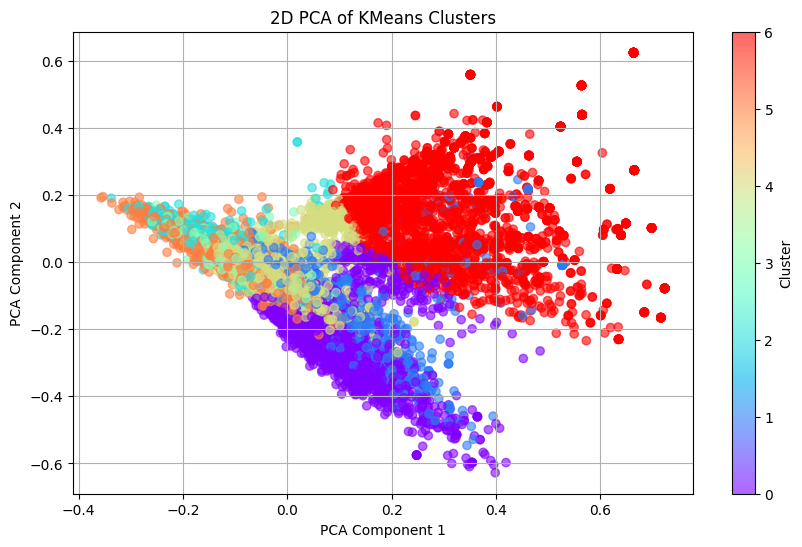

In [ ]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=df['cluster'], cmap='rainbow', alpha=0.6)
plt.title('2D PCA of KMeans Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

C:\Users\Mercy\AppData\Local\Temp\ipykernel_17288\776771506.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df, palette='Set2')


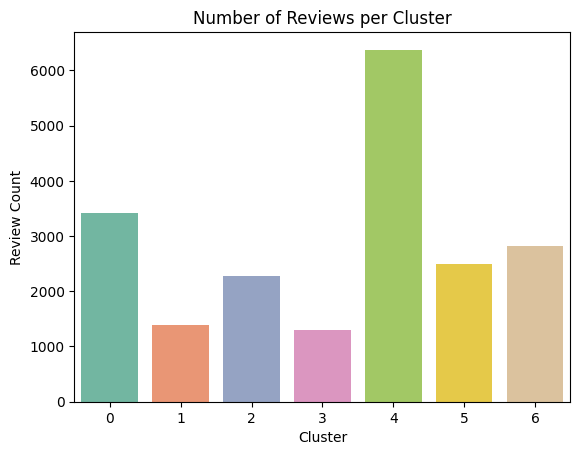

In [ ]:
sns.countplot(x='cluster', data=df, palette='Set2')
plt.title('Number of Reviews per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Review Count')
plt.show()

## 7.1: Sentiment Analysis Per Cluster
Analyze the sentiment (positive, negative, neutral) within each cluster to understand the emotional tone of reviews.

* what are we achieving:
    * Proportion of positive (rating ≥ 4), neutral (rating = 3), and negative (rating ≤ 2) reviews per cluster.
    * Average rating per cluster to identify which clusters contain more favorable reviews.


Sentiment Distribution per Cluster (Proportion):
 sentiment  Negative   Neutral  Positive
cluster                                
0          0.132301  0.047605  0.820093
1          0.002896  0.011586  0.985518
2          0.005256  0.016645  0.978099
3          0.016279  0.021705  0.962016
4          0.086759  0.064638  0.848604
5          0.011240  0.036130  0.952629
6          0.054255  0.045745  0.900000

Average Rating per Cluster:
 cluster
0    4.303446
1    4.849385
2    4.761279
3    4.693798
4    4.336680
5    4.604175
6    4.574823
Name: rating, dtype: float64


<Figure size 1000x600 with 0 Axes>

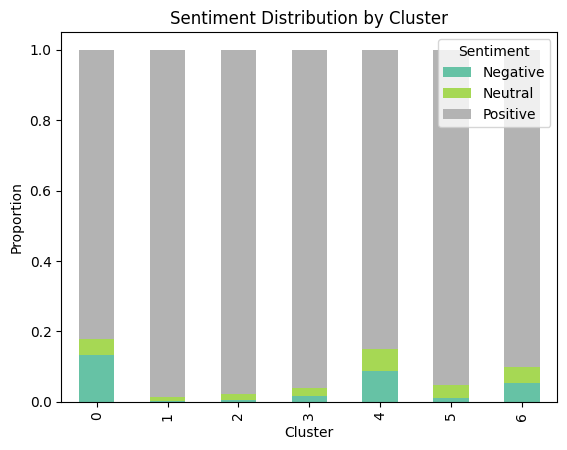

In [ ]:
def analyze_cluster_sentiment(df):
    df['sentiment'] = df['rating'].apply(lambda x: 'Positive' if x >= 4 else 'Negative' if x <= 2 else 'Neutral')
    sentiment_dist = df.groupby('cluster')['sentiment'].value_counts(normalize=True).unstack().fillna(0)
    print("\nSentiment Distribution per Cluster (Proportion):\n", sentiment_dist)
    avg_rating = df.groupby('cluster')['rating'].mean()
    print("\nAverage Rating per Cluster:\n", avg_rating)
    
    plt.figure(figsize=(10, 6))
    sentiment_dist.plot(kind='bar', stacked=True, colormap='Set2')
    plt.title('Sentiment Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Proportion')
    plt.legend(title='Sentiment')
    plt.show()

analyze_cluster_sentiment(df)

## 7.2: Top Products per Cluster
Identify the most representative products in each cluster by grouping reviews by product name and counting occurrences or aggregating ratings.

* What are we achieving:
    * Top 3–5 products per cluster based on review count or average rating.
    * Example reviews for these products to provide context.

In [ ]:
def top_products_per_cluster(df, n=3):
    for cluster in df['cluster'].unique():
        cluster_df = df[df['cluster'] == cluster]
        top_products = cluster_df.groupby('name').agg({
            'rating': ['count', 'mean'],
            'clean_text': lambda x: list(x)[:2] 
        }).reset_index()
        top_products.columns = ['name', 'review_count', 'avg_rating', 'sample_reviews']
        top_products = top_products.sort_values(by='review_count', ascending=False).head(n)
        print(f"\nTop {n} Products in Cluster {cluster}:\n")
        print(top_products[['name', 'review_count', 'avg_rating']])
        print("\nSample Reviews:")
        for idx, row in top_products.iterrows():
            print(f"\nProduct: {row['name']}")
            for review in row['sample_reviews']:
                print(f"- {review}")

top_products_per_cluster(df)


Top 3 Products in Cluster 4:

                                                 name  review_count  \
38  AmazonBasics AAA Performance Alkaline Batterie...          1597   
24  Amazon Echo Show Alexa-enabled Bluetooth Speak...           599   
5   All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...           575   

    avg_rating  
38    4.079524  
24    4.619366  
5     4.398261  

Sample Reviews:

Product: AmazonBasics AAA Performance Alkaline Batteries (36 Count)
- one item bad qualiti miss backup spring order one item bad qualiti miss backup spring put pc aluminum make batteri work
- alway less expens way go product like bulk alway less expens way go product like

Product: Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen
- amazon echo show greatest gift ever great gift anyon easi setup coexist iot devic alexa awesom
- amazon echo show super excit give gift super conveni best buy echo product store instead purchas amazon

Product: All-New Fire HD 8 Tablet, 8 HD Display

## 7.3: Word Clouds for Clusters
Word clouds based on TF-IDF weights or raw term frequencies for each cluster.

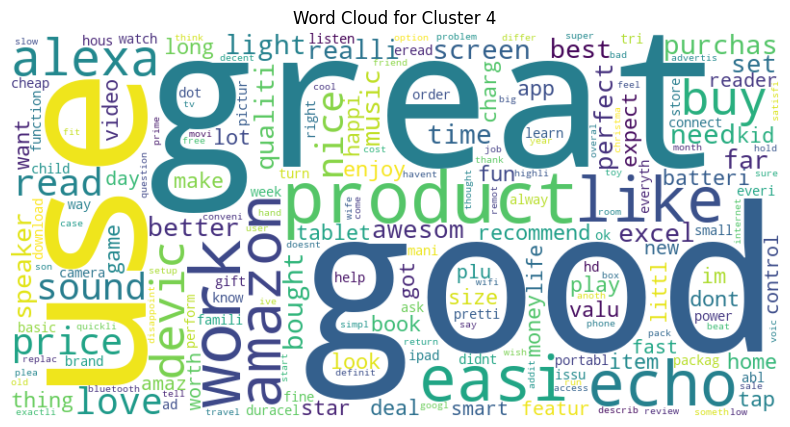

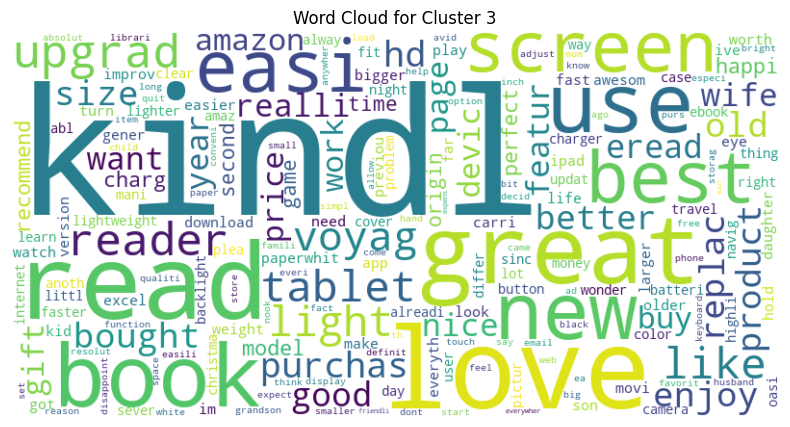

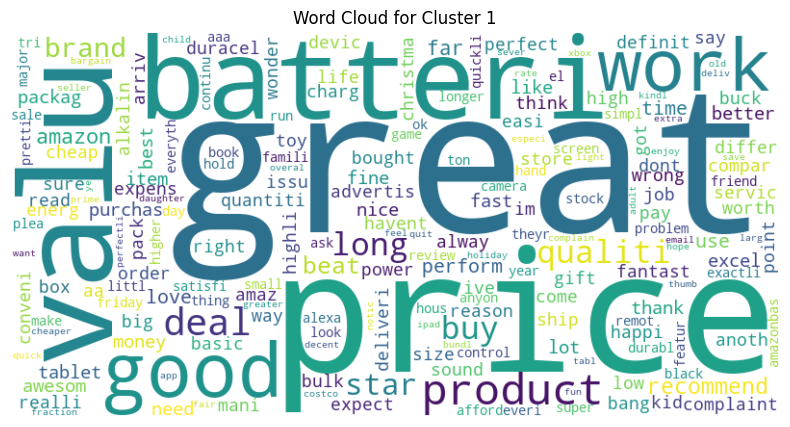

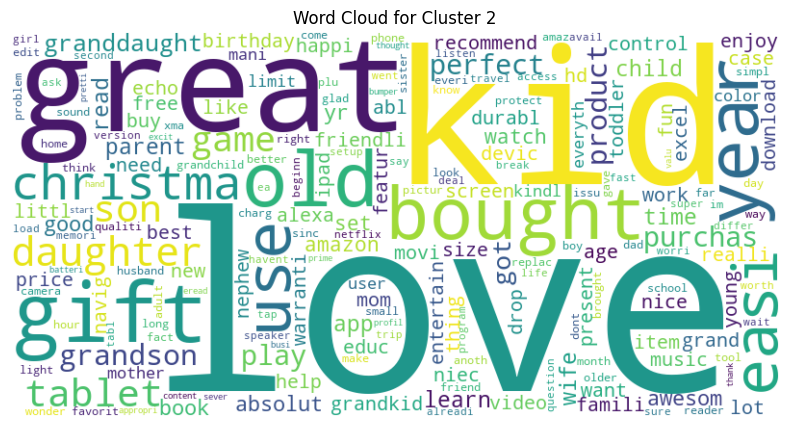

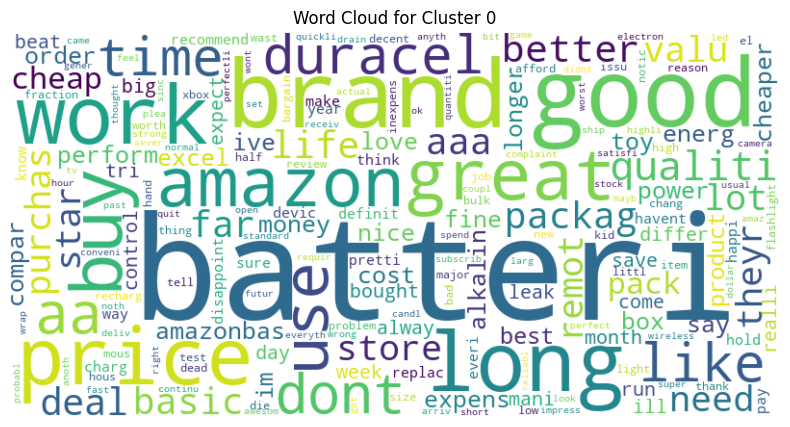

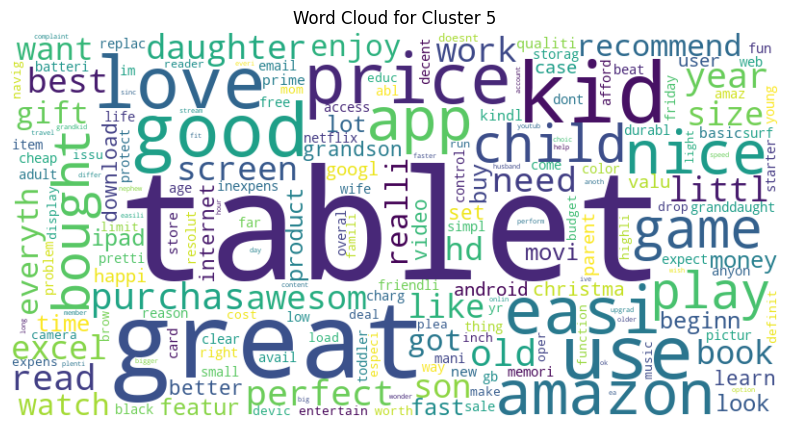

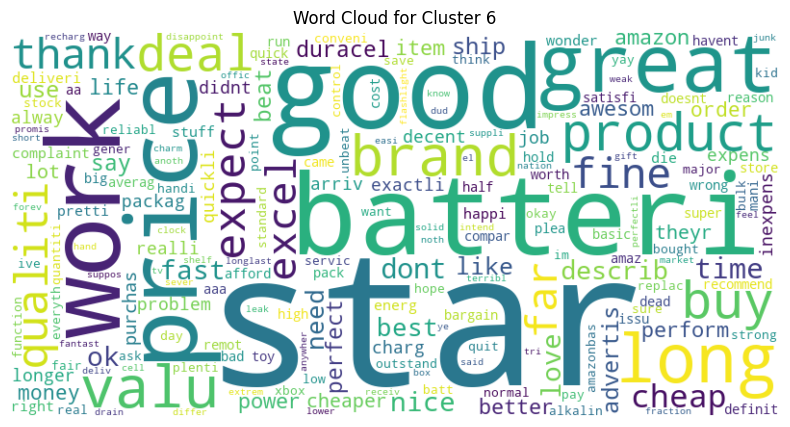

In [ ]:
def plot_word_clouds(df, vectorizer, X):
    feature_names = vectorizer.get_feature_names_out()
    for cluster in df['cluster'].unique():
        cluster_indices = df[df['cluster'] == cluster].index
        cluster_tfidf = X[cluster_indices].sum(axis=0).A1  # Sum TF-IDF scores
        word_scores = dict(zip(feature_names, cluster_tfidf))
        
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Cluster {cluster}')
        plt.axis('off')
        plt.show()

plot_word_clouds(df, vectorizer, X)

## 7.4: Product Categories
Validation distribution of primaryCategories (e.g., Electronics, Hardware) across clusters and whether clusters align with primaryCategories or categories.


Primary Categories Distribution per Cluster (Proportion):
 primaryCategories  Animals & Pet Supplies  Electronics  Electronics,Furniture  \
cluster                                                                         
0                                0.000000     0.010222               0.000000   
1                                0.000724     0.179580               0.000000   
2                                0.000000     0.659220               0.000000   
3                                0.000000     0.835659               0.000000   
4                                0.000784     0.461406               0.000314   
5                                0.000000     0.871136               0.000000   
6                                0.000000     0.001064               0.000000   

primaryCategories  Electronics,Hardware  Electronics,Media  Health & Beauty  \
cluster                                                                       
0                              0.000292           0.

<Figure size 1200x600 with 0 Axes>

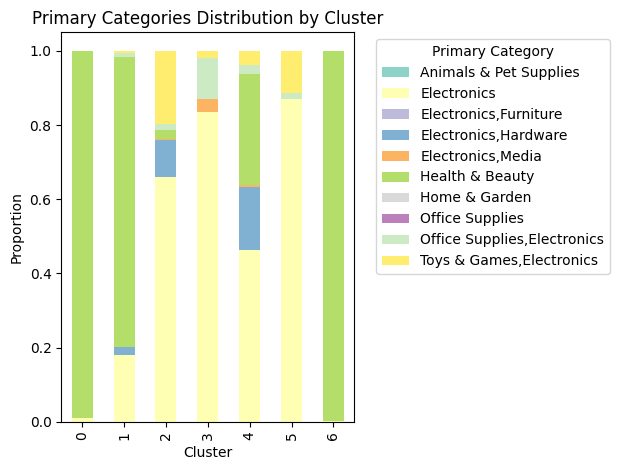

In [ ]:
def analyze_categories_per_cluster(df):
    category_dist = df.groupby('cluster')['primaryCategories'].value_counts(normalize=True).unstack().fillna(0)
    print("\nPrimary Categories Distribution per Cluster (Proportion):\n", category_dist)
    plt.figure(figsize=(12, 6))
    category_dist.plot(kind='bar', stacked=True, colormap='Set3')
    plt.title('Primary Categories Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Proportion')
    plt.legend(title='Primary Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

analyze_categories_per_cluster(df)

## 7.5: Hierarchical Clustering
Using hierarchical clustering to create a dendrogram and explore how reviews group at different levels.

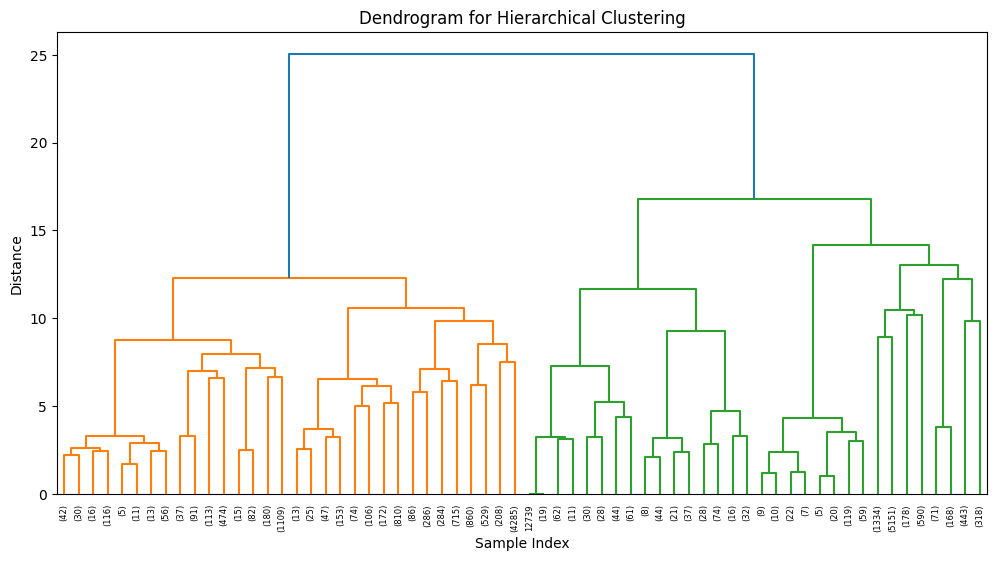


Hierarchical Cluster Distribution:
 cluster_hierarchical
0    11043
4     7253
1     1000
2      516
3      251
Name: count, dtype: int64


In [ ]:
Z = linkage(X.toarray(), method='ward')
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
hierarchical = AgglomerativeClustering(n_clusters=5)
df['cluster_hierarchical'] = hierarchical.fit_predict(X.toarray())
print("\nHierarchical Cluster Distribution:\n", df['cluster_hierarchical'].value_counts())

## 7.6: DBSCAN 
identify clusters of arbitrary shape and detecting outliers

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster_dbscan'] = dbscan.fit_predict(X)
print("\nDBSCAN Cluster Distribution (including noise):\n", df['cluster_dbscan'].value_counts())
noise_reviews = df[df['cluster_dbscan'] == -1]
print("\nSample Noise Reviews (if any):")
print(noise_reviews[['name', 'clean_text', 'rating']].head())


DBSCAN Cluster Distribution (including noise):
 cluster_dbscan
-1     18268
 4       672
 8       127
 18       62
 30       53
       ...  
 68        5
 67        5
 72        5
 69        5
 73        5
Name: count, Length: 75, dtype: int64

Sample Noise Reviews (if any):
                                                name  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation...   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation...   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation...   

                                          clean_text  rating  
0  small thought would big small paper turn like ...       3  
1  great light reader easi use beach kindl light ...       5  
2  great price didnt know much id use kindl went ...       4  
3  great buy happi purchas caught sale realli goo...       5  
4  solid entrylevel kindl great kid solid entri l...       5  


## 7.7: Cluster Size Comparision
Creating a pie chart to show the proportion of reviews in each cluster.

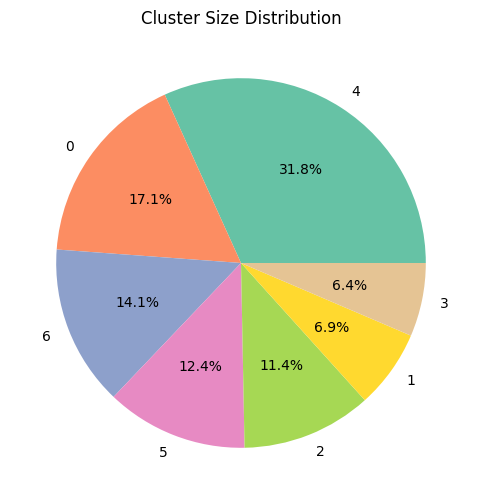

In [ ]:
cluster_counts = df['cluster'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Cluster Size Distribution')
plt.show()

## Step 8: Product Evaluations

## 8.1: Product Recommendations 
Using cluster information to recommend products based on positive reviews within clusters.

In [ ]:
def recommend_products(df, n=3):
    recommendations = []
    for cluster in df['cluster'].unique():
        cluster_df = df[df['cluster'] == cluster]
        top_products = cluster_df.groupby('name')['rating'].mean().nlargest(n).reset_index()
        recommendations.append((cluster, top_products))
        print(f"\nTop {n} Recommended Products in Cluster {cluster}:\n", top_products)
    return recommendations

recommendations = recommend_products(df)


Top 3 Recommended Products in Cluster 4:
                                                 name  rating
0  All-new Echo (2nd Generation) with improved so...     5.0
1                           Amazon Echo Show - Black     5.0
2                              Amazon Echo ‚Äì White     5.0

Top 3 Recommended Products in Cluster 3:
                                                 name  rating
0  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...     5.0
1  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...     5.0
2  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...     5.0

Top 3 Recommended Products in Cluster 1:
                                                 name  rating
0  All-New Fire HD 8 Kids Edition Tablet, 8 HD Di...     5.0
1  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...     5.0
2  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...     5.0

Top 3 Recommended Products in Cluster 2:
                                                 name  rating
0  All-New Fire HD 8 Tablet, 8 HD D

## 8.2: Customer Pain Points
Identifying common complaints in low-rated reviews within each cluster.

In [ ]:
def analyze_negative_reviews(df, vectorizer, X):
    negative_df = df[df['rating'] <= 2]
    feature_names = vectorizer.get_feature_names_out()
    for cluster in negative_df['cluster'].unique():
        cluster_neg = negative_df[negative_df['cluster'] == cluster]
        cluster_indices = cluster_neg.index.tolist()
        if len(cluster_indices) == 0:
            continue
        cluster_tfidf = X[cluster_indices].sum(axis=0).A1
        cluster_tfidf = cluster_tfidf[:len(feature_names)]
        top_terms = pd.Series(cluster_tfidf, index=feature_names).nlargest(5)
        print(f"\nTop Terms in Negative Reviews for Cluster {cluster}:\n", top_terms)
        print("\nSample Negative Reviews:")
        print(cluster_neg['clean_text'].head(2))

analyze_negative_reviews(df, vectorizer, X)


Top Terms in Negative Reviews for Cluster 4:
 dont       20.896322
use        19.260735
buy        17.467668
batteri    16.359356
work       15.388097
dtype: float64

Sample Negative Reviews:
20    trick buy look kindl whitepap saw onlin deal o...
70    dont bother look pictur see th gener assum wou...
Name: clean_text, dtype: object

Top Terms in Negative Reviews for Cluster 1:
 dont     1.151237
great    1.129606
long     0.794046
price    0.730083
brand    0.602464
dtype: float64

Sample Negative Reviews:
1003    great give great answer connect great exchang ...
9219    great price get pay great price get pay xfinit...
Name: clean_text, dtype: object

Top Terms in Negative Reviews for Cluster 2:
 day            1.372684
old            1.275389
granddaught    1.114800
year           1.108677
use            0.994463
dtype: float64

Sample Negative Reviews:
1579    much use didnt find use yr old daugter return ...
1940    eh year old drop stand posit foot ground bust ...
Name: clean_t

## 8.3: Top 5 Best products

In [ ]:
sorted_df = df.sort_values(by=["rating", "clean_text"], ascending=[False, False])
unique_best = sorted_df.drop_duplicates(subset="name", keep="first")
best_products = unique_best.head(5)

In [ ]:
for _, row in best_products.iterrows():
    print(f"Image URL: {row['imageURLs']}")
    print(f"Product Name: {row['name']}")
    print(f"Review: {row['clean_text']}")
    print(f"Rating: {row['rating']}")
    print(f"Primary Categories: {row['primaryCategories']}")
    print("-" * 40)

def process_review(image_url, review, rating):
    print(f"Processing: {image_url}, {review}, {rating}")

Image URL: https://images-na.ssl-images-amazon.com/images/I/812VtLZldxL._SL1500_.jpg,http://ecx.images-amazon.com/images/I/61G-GoYTzqL._SX300_QL70_.jpg,https://images-na.ssl-images-amazon.com/images/I/51B33zAcFHL._SL1046_.jpg,https://images-na.ssl-images-amazon.com/images/I/81Qh9BSRHeL._SL1500_.jpg,http://ecx.images-amazon.com/images/I/31NP3yqXc6L._SS40_.jpg,https://images-na.ssl-images-amazon.com/images/I/81MfxWiHXpL._SL1500_.jpg,https://www.barcodable.com/images/barcode/0841710106411.png,https://images-na.ssl-images-amazon.com/images/I/81cz5-izU0L._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/31Q8gxIM%252525252525252BcL._SS40_.jpg,https://www.upccodesearch.com/images/barcode/0841710106411.png,https://images-na.ssl-images-amazon.com/images/I/51h3MICcFZL.jpg,https://images-na.ssl-images-amazon.com/images/I/71uoC2uV9LL._SL1500_.jpg
Product Name: AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary
Review: zippi smooth goe great distanc order car

## 8.4: Worst Product

In [ ]:
worst_product = df.sort_values(by='label', ascending=True).head(1)

print("\nWorst Product:")
for index, row in worst_product.iterrows():
    print(f"Image URL: {row['imageURLs']}")
    print(f"Product Name: {row['name']}")
    print(f"Review: {row['clean_text']}")
    print(f"Rating: {row['rating']}")
    print(f"Primary Categories: {row['primaryCategories']}")
    print("-" * 40)

def process_review(image_url, review, rating):
    print(f"Processing: {image_url}, {review}, {rating}")


Worst Product:
Image URL: https://pisces.bbystatic.com/image2/BestBuy_US/images/products/5026/5026000_sd.jpg,http://static.bhphoto.com/images/multiple_images/thumbnails/1462202036000_IMG_621524.jpg,https://i5.walmartimages.com/asr/8d86520e-e3f0-4aad-ac61-a0fab7f1a615_1.3007ecfa1b2b224191d40e85b0afa876.jpeg?odnHeight=450&odnWidth=450&odnBg=FFFFFF,https://pisces.bbystatic.com/image2/BestBuy_US/images/products/5026/5026000_sa.jpg,https://i5.walmartimages.com/asr/6e9dc010-6a31-4c16-8259-4c99fd90296a_1.c7aa7fbd98d25dc39499c5f4f98c40e3.jpeg?odnHeight=450&odnWidth=450&odnBg=FFFFFF,https://www.barcodable.com/images/barcode/0841667103389.png,https://images-na.ssl-images-amazon.com/images/I/519fu1sKs%2BL.jpg
Product Name: Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case
Review: disappoint product look tablet young daughter sale good review consult sale associ question decid purchas item nice look product howev littl storag space download app storag full requir buy also pla

## Step 9: Cluster based Sentiment

In [ ]:
def assign_cluster_sentiment(df, k):
    cluster_avgs = df.groupby(f'cluster_k{k}')['rating'].mean()
    sentiment_map = {}
    for cluster in cluster_avgs.index:
        avg_rating = cluster_avgs[cluster]
        if avg_rating >= 4:
            sentiment_map[cluster] = 'Positive'
        elif avg_rating >= 3:
            sentiment_map[cluster] = 'Neutral'
        else:
            sentiment_map[cluster] = 'Negative'
    return df[f'cluster_k{k}'].map(sentiment_map)

for k in range(2, 8):
    df[f'sentiment_label_k{k}'] = assign_cluster_sentiment(df, k)

#df.head()

In [ ]:
df.columns

Index(['name', 'asins', 'brand', 'categories', 'primaryCategories',
       'imageURLs', 'doRecommend', 'rating', 'sourceURLs', 'label',
       'clean_text', 'cluster', 'cluster_k2', 'cluster_k3', 'cluster_k4',
       'cluster_k5', 'cluster_k6', 'cluster_k7', 'sentiment',
       'cluster_hierarchical', 'cluster_dbscan', 'sentiment_label_k2',
       'sentiment_label_k3', 'sentiment_label_k4', 'sentiment_label_k5',
       'sentiment_label_k6', 'sentiment_label_k7'],
      dtype='object')